# Phys555 Assignment 1 Question 3

Q3- Add noise to the MNIST data set (explore the web to find a good example). Compare the explained variance ratio vs. the principle components (plots) and find the best first components so that the added noise is removed/cancelled. Change the amplitude of the noise and have a discussion in the notebook. 

https://scikit-image.org/docs/stable/api/skimage.util.html#random-noise

In [51]:
# Questions: 
# In the example from class, you're plotting the input vs the validation, but at the same index which doesn't plot the same number
# Why do we need to use the validation set, or do we? Currently I am not using the validation set 
# It looks like all of the components are important - is there a hint to determining when the noise is cancelled? 

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
import skimage
import matplotlib.pyplot as plt

(60000, 784)
(60000, 784)
(10000, 784)


Text(0.5, 1.0, 'Original Image vs Added Noise')

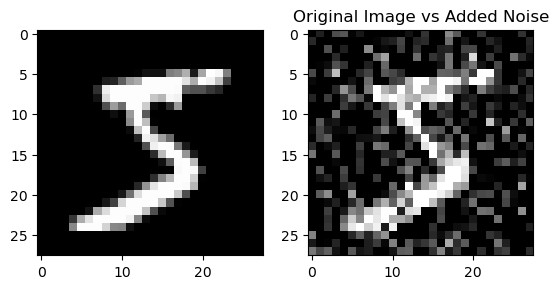

In [55]:
(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()
inp_tr = inp_tr/255.
inp_va = inp_va/255.

# Do I need to calculate the mean, etc? 
inp_tr=np.reshape(inp_tr,(-1,28*28))

# why do I need va? 
inp_va=np.reshape(inp_va,(-1,28*28))

print(inp_tr.shape)

# Would you add noise to the validation set as well? I don't think so... 
#noisy_images = skimage.util.random_noise(inp_tr, mode='s&p', seed=None, clip=True, amount=0.1)
#noisy_images = skimage.util.random_noise(inp_tr, mode='localvar', seed=None, clip=True)
noisy_images_tr = skimage.util.random_noise(inp_tr, mode='gaussian', seed=None, clip=True, var=0.08)
#noisy_images_va = skimage.util.random_noise(inp_va, mode='gaussian', seed=None, clip=True, var=0.02)
print(noisy_images_tr.shape)
print(inp_va.shape)

# Look at the first image with noise
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(inp_tr[0].reshape(28,28),cmap='gray')
ax2.imshow(noisy_images_tr[0].reshape(28,28),cmap='gray')
plt.title('Original Image vs Added Noise')

5145


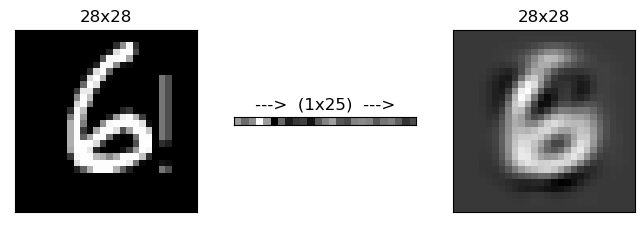

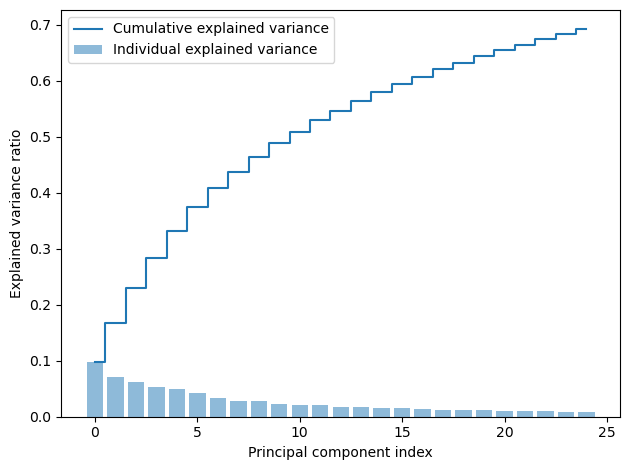

In [57]:
# Not noisy data plots 

#n_pic = np.random.choice(np.arange(len(noisy_images_va)))
n_pic = np.random.choice(np.arange(len(inp_va)))
print(n_pic)
# This doesn't seem to be showing the same thing? 

for kc in [25]:
    n_components=kc
    pca=PCA(n_components=n_components)

    # same thing as fit_transform from q1
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    exp_var_pca = pca.explained_variance_ratio_
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)

    #sx= int(np.sqrt(n_components))
    #sy= int(np.sqrt(n_components))
    plt.figure(n_pic, figsize=(8,8))
    #approximation = pca.inverse_transform(inp_va_pca[n_pic]) # re-construct the image
    approximation = pca.inverse_transform(inp_tr_pca[n_pic])
    fig = plt.figure(n_pic)
    plt.subplot(1, 3, 1)
    plt.imshow(inp_tr[n_pic].reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 2)
    #plt.imshow(inp_va_pca[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.imshow(inp_tr_pca[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    # Create the visualization plot
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

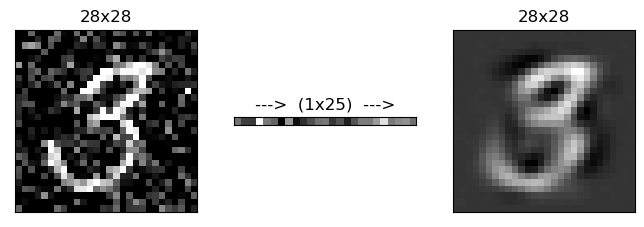

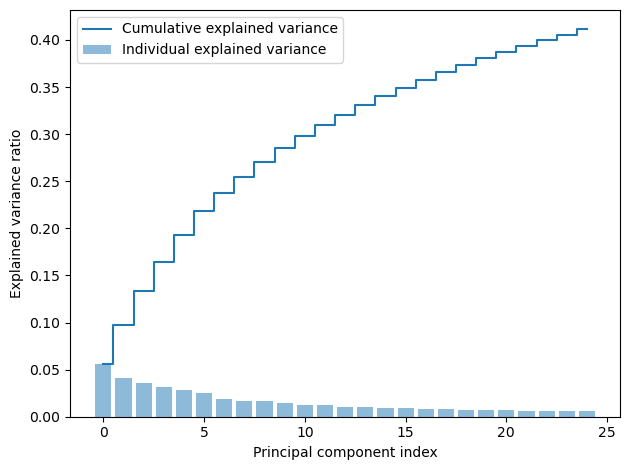

In [58]:
# Noisy data plots

#n_pic = np.random.choice(np.arange(len(noisy_images_va)))
n_pic = np.random.choice(np.arange(len(inp_va)))
# This doesn't seem to be showing the same thing? Why would you plot the validation one and compare it to the input one? They don't seem to be ordered the same, so the numbers don't match up. 

for kc in [25]:
    n_components=kc
    pca=PCA(n_components=n_components)

    # same thing as fit_transform from q1
    pca.fit(noisy_images_tr)
    inp_tr_pca = pca.transform(noisy_images_tr)
    #inp_va_pca = pca.transform(noisy_images_va)
    inp_va_pca = pca.transform(inp_va)
    
    exp_var_pca = pca.explained_variance_ratio_
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)

    #sx= int(np.sqrt(n_components))
    #sy= int(np.sqrt(n_components))
    plt.figure(n_pic, figsize=(8,8))
    #approximation = pca.inverse_transform(inp_va_pca[n_pic]) # re-construct the image
    approximation = pca.inverse_transform(inp_tr_pca[n_pic]) # re-construct the image
    fig = plt.figure(n_pic)
    plt.subplot(1, 3, 1)
    plt.imshow(noisy_images_tr[n_pic].reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 2)
    #plt.imshow(inp_va_pca[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.imshow(inp_tr_pca[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    # Create the visualization plot
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()